<a href="https://colab.research.google.com/github/Akyadavv/Bike-Sharing-Demand-Prediction/blob/main/RegressionSubmission_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Bike Sharing Demand Prediction



##### **Project Type**    - Regression
##### **Contribution**    - Individual

# **Project Summary -**

The project is about predicting demand of rentals bike across cities.Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort.It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

The data set consisted of rental bike demands in the past based on  various  conditions like weather and time of the day. To make the demand prediction I used Regression ML models like linear regression, Lasso regresion and ridge regresion. Based on the prediction made by these models I evaluated which one was giving best predictions.

Following are the steps taken to complete this project:
* Understanding Data : The given data set had shape of (8760, 14), It was a clean dataset having no null values and no duplicated values.Out of 14 features four were categorical and our target feature was "Rented Bike Count".
* Data vizualization and story telling: This step is important to know the relationship between our target variable and independent features. It is key to find out underlying trend and patterns which can help business in data driven decision making. Following are the insights I find during data vizualization:
  * Bike demand was higher in the weekdays as compared to weekends.And in day morning and evening had the highest demand which suggest people must be using this bikes to go office or school.
  * June had the highest demand as compare to other months.
  * During rainfall and snowfall demand reduces significantly.
  * People of the city use bike the most when temprature is between 20- 30 degree celsius.
* Feature engineering and Data preprocessing: this step involves adding new feature to the dataset and prepare dataset so that we could apply ml models.
* ML model implementation : Applied different Ml models on the processed dataset and evaluted the metrics. following are the ML models that i used
  * Linear regression : Linear regression is a statistical modeling technique used to analyze the relationship between a dependent variable and one or more independent variables. It assumes a linear relationship between the variables and aims to find the best-fitting straight line that minimizes the difference between the observed and predicted values. By estimating the slope and intercept of the line, linear regression allows us to make predictions and understand how changes in the independent variables affect the dependent variable. It is a simple yet powerful method for understanding and predicting numerical outcomes based on given data.
  * Ridge regression is a regularization technique used in linear regression to mitigate the problem of multicollinearity and overfitting. It adds a penalty term to the loss function, which shrinks the coefficient estimates towards zero. Unlike Lasso regression, Ridge regression retains all the features and does not perform feature selection by setting coefficients to zero. It is particularly useful when dealing with highly correlated predictors, as it helps to stabilize the model and reduce the impact of multicollinearity on the coefficient estimates.
  * Lasso regression is a regression technique that incorporates a regularization term to the ordinary least squares method. It not only aims to fit the data but also reduces the model complexity by enforcing some coefficients to become exactly zero. This feature of lasso regression allows for automatic feature selection and can be useful when dealing with high-dimensional data. In contrast, ridge regression shrinks the coefficients towards zero without making them exactly zero. This key difference makes lasso regression particularly effective in identifying and excluding irrelevant variables from the model, providing a more interpretable and sparse solution.
  * Elastic net regression is a linear regression model that combines the strengths of both ridge regression and lasso regression. It addresses the limitations of these methods by introducing a hybrid regularization term that consists of both L1 (lasso) and L2 (ridge) penalties. This allows elastic net to handle multicollinearity and perform feature selection simultaneously. By controlling the mixing parameter, elastic net can emphasize either L1 or L2 regularization, making it flexible in handling different types of datasets. Overall, elastic net regression provides a powerful tool for regression analysis by balancing model complexity and variable selection.
  * Decision tree regression is a machine learning model that predicts continuous numeric values. It uses a tree-like structure, where each internal node represents a feature and each leaf node represents a predicted value. The tree is built by recursively splitting the data based on the selected features, aiming to minimize the variance within each resulting subset. During prediction, a new data point traverses the tree, following the split decisions, until it reaches a leaf node, which provides the predicted value. Decision tree regression is intuitive, interpretable, and can handle non-linear relationships between variables, making it a valuable tool for regression tasks.
  * Random Forest regression is a machine learning model that combines multiple decision trees to make accurate predictions. It creates a forest of randomly selected trees and aggregates their predictions to generate the final result. Each tree is trained on a subset of the data, and the model reduces overfitting by averaging the predictions of multiple trees. This ensemble approach provides robustness, handles non-linear relationships, and can handle both numerical and categorical variables. It is a versatile and powerful model for regression tasks, delivering high predictive accuracy and handling complex datasets with ease.

* Conclusion : this step involved concluding which ml model performed best and which can be use to predict demand in future






# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


 Many big cities have adopted the use of rental bikes to improve mobility comfort. It is crucial to make the rental bikes accessible and available to the general public at the appropriate time since it reduces waiting. Eventually, maintaining a steady supply of rental bikes for the city emerges as a top priority. Predicting the number of bikes needed to maintain a steady supply of rental bikes at each hour's interval is essential.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [57]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

### Dataset Loading

In [58]:
# Load Dataset
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [59]:
df = pd.read_csv('/content/drive/MyDrive/projects data/SeoulBikeData.csv', encoding = 'ISO-8859-1', low_memory = False)

### Dataset First View

In [60]:
# Dataset First Look
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


### Dataset Rows & Columns count

In [61]:
# Dataset Rows & Columns count
df.shape

(8760, 14)

### Dataset Information

In [62]:

# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#### Duplicate Values

In [63]:
# Dataset Duplicate Value Count
sum(df.duplicated())

0

#### Missing Values/Null Values

In [64]:
# Missing Values/Null Values Count
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

### What did you know about your dataset?

The given data set had shape of (8760, 14), It was a clean dataset having no null values and no duplicated values.Out of 14 features four were categorical and our target feature was "Rented Bike Count".

## ***2. Understanding Your Variables***

In [65]:
# Dataset Columns
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [66]:
# Dataset Describe
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


### Variables Description 

* **Rented Bike Count**: This is Dependent variable and shows number of bike count 
* **Date**: Date range in the dataset is from 01/12/2017 to 30/11/2018.(str)
* **Hour**: In dataset hour is in digital time format.(int)
* **Seasons**: This shows four seasons present in dataset.(str)
* **Temperature(°C)'**: Temperature is in celsius.(float)
* **Snowfall (cm)**: It shows amount of snowfall in cm.(floa)
* **Rainfall(mm)**: It shows amount of rainfall in mm.(float)
* **Wind speed (m/s)**: It shows speed of wind in m/s.(float)
* **Solar Radiation (MJ/m2)**: It shows solar radiation intensity.(float)
* **Dew point temperature(°C)**: It tells about the temperature in the beginning of the day. (float)
* **Visibility (10m)**: Is given in m. (int)
* **Humidity(%)**: It shows humid present in air in %.(int)
* **Holiday**: It tells if its during holiday. (str)
* **Functioning Day**: It tells if the day is functioning or not.(str)


### Check Unique Values for each variable.

In [67]:
# Check Unique Values for each variable.
df.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [68]:
# Write your code to make your dataset analysis ready.
categorical_df = ['Seasons',
       'Holiday', 'Functioning Day']
numerical_df = [x for x in df.columns if x not in categorical_df]
numerical_df.pop(0)
#changed the dtype of Date from object tp datetime
df['Date'] = df['Date'].apply(lambda x: datetime.datetime.strptime(x, '%d/%m/%Y'))


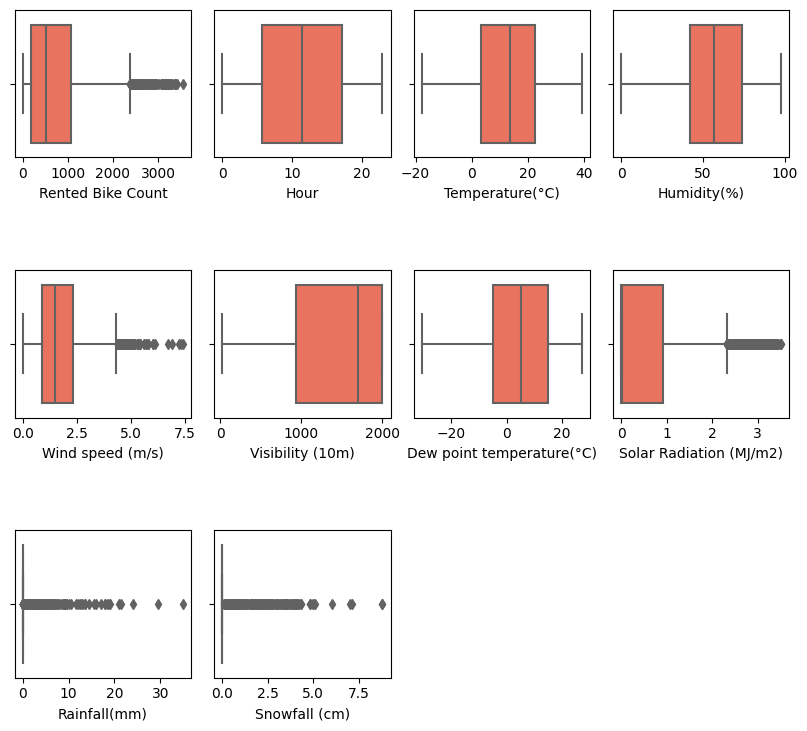

In [69]:
#Checking for outliers

fig = plt.figure(figsize=(8,25))
c=1
for i in numerical_df :
    plt.subplot(10, 4, c)
    plt.xlabel('Distibution of {}'.format(i))
    sns.boxplot(x=i,data=df,color="tomato")
    c = c + 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

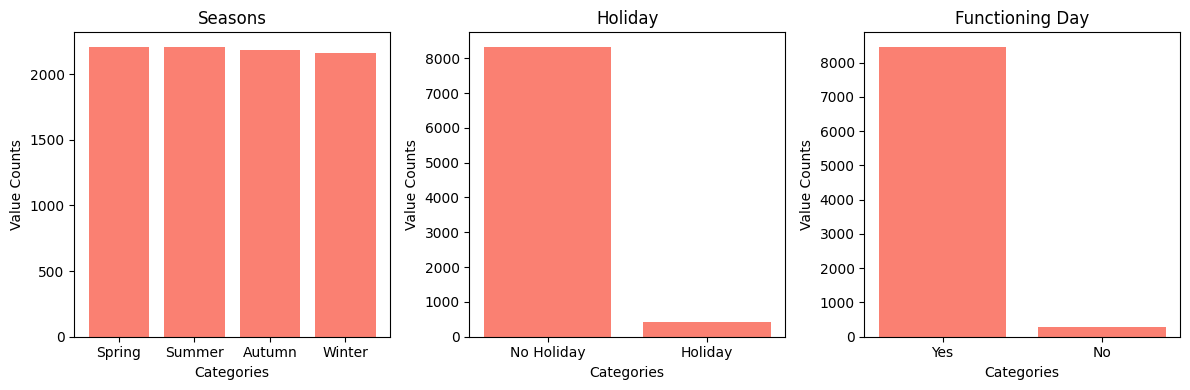

In [70]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
    
for i, ax in enumerate(axes):
  ax.bar(df[categorical_df[i]].value_counts().index, df[categorical_df[i]].value_counts().values,color = 'salmon')
  ax.set_title(categorical_df[i])
  ax.set_xlabel("Categories")
  ax.set_ylabel("Value Counts")
    
plt.tight_layout()
plt.show()

### What all manipulations have you done and insights you found?

* Converted Date datatype from object to datetime.
* Made list of categorical and numerical feature name.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

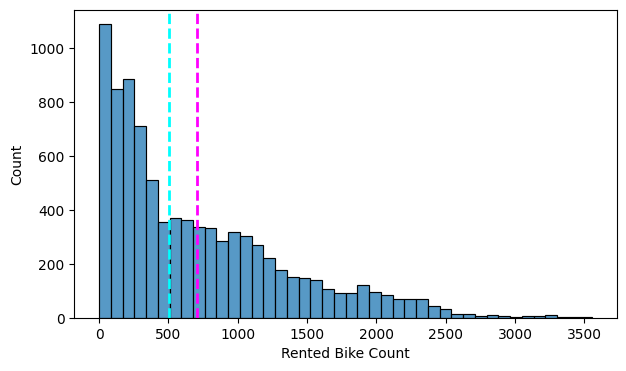

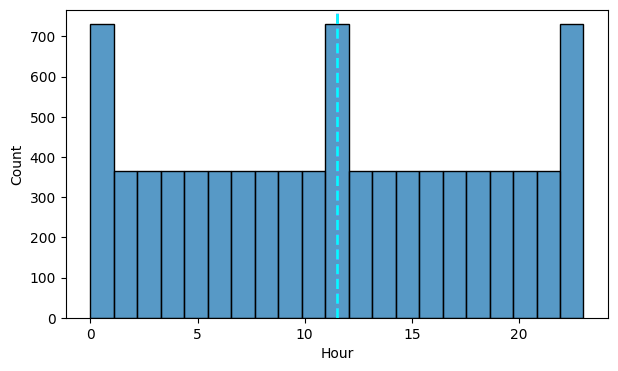

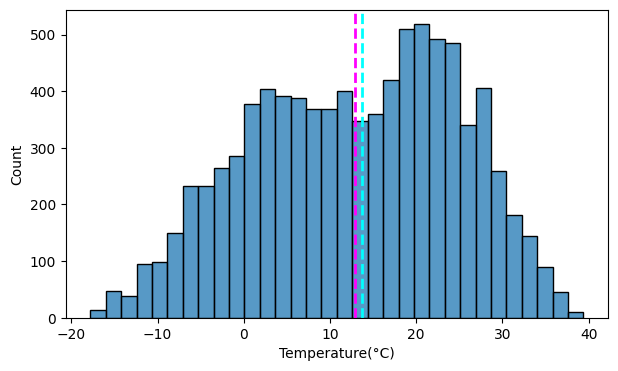

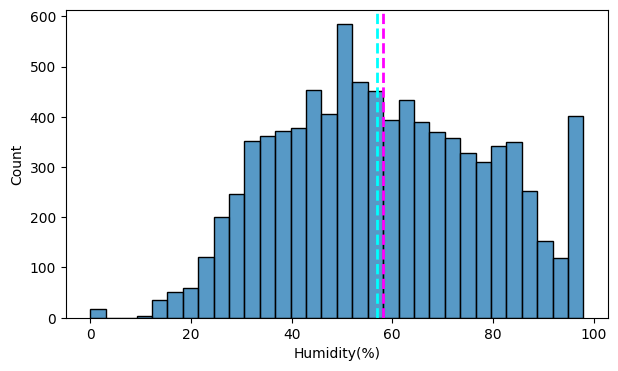

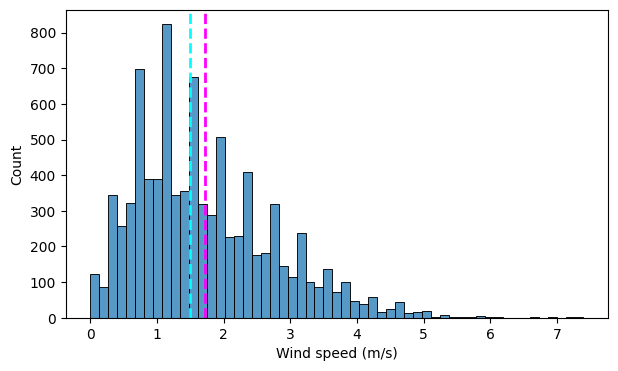

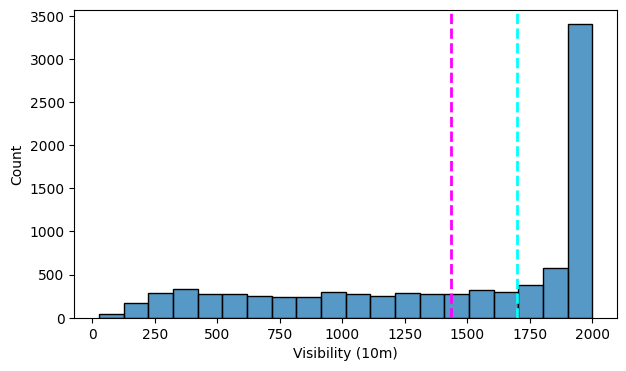

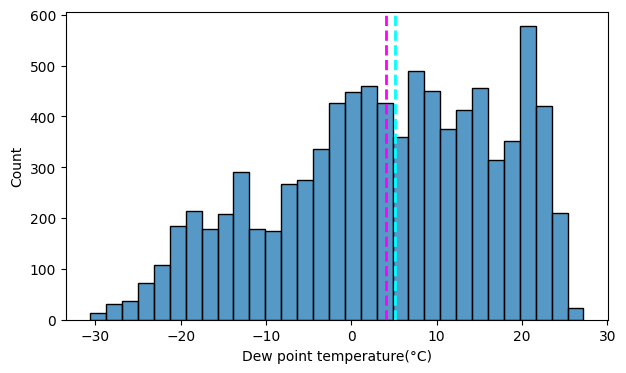

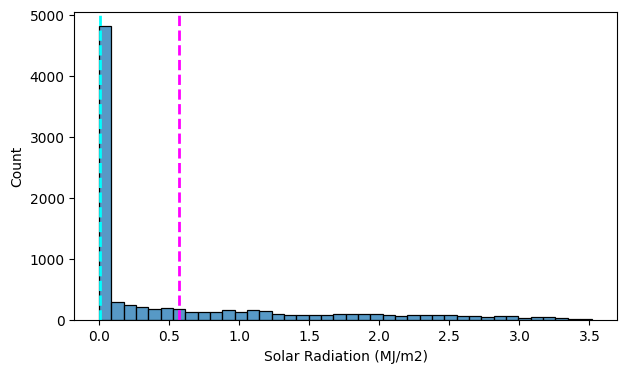

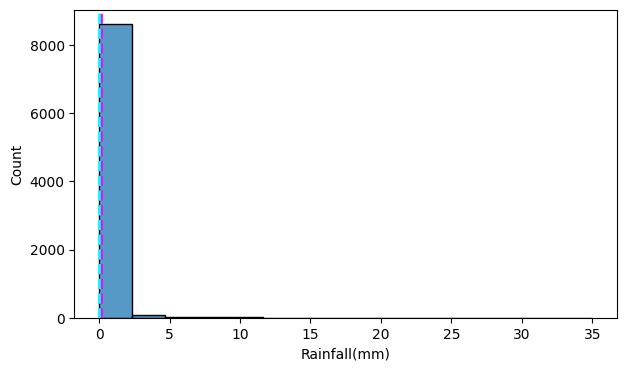

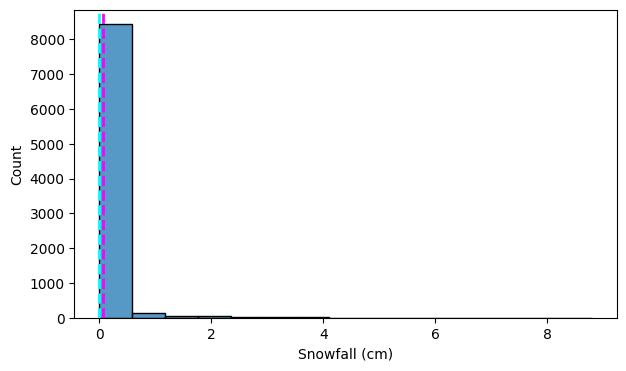

In [71]:
# Chart - 1 visualization code
for col in numerical_df:
    fig = plt.figure(figsize=(7, 4))
    ax = fig.gca()
    feature = df[col]
    sns.histplot(x= df[col])
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    plt.xlabel(col)
plt.show()


##### 1. Why did you pick the specific chart?

To check the skewness of numerical independent and dependent features.

##### 2. What is/are the insight(s) found from the chart?

* Rented bike Count which is our target feature is rightly skewed.
* wind speed is rightly skewed
* Visibility is left skewed


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

these insights gives information about which features need to be dealt for skewness

#### Chart - 2

<Axes: xlabel='Snowfall (cm)', ylabel='Rented Bike Count'>

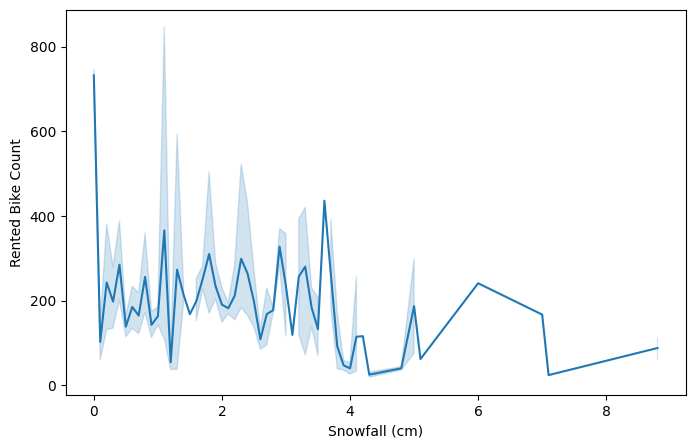

In [72]:
# Chart - 2 
# Relationship between snowfall and rented_bike_count
fig.ax=plt.subplots(figsize=(8,5))
sns.lineplot(data=df,x='Snowfall (cm)',y='Rented Bike Count')

##### 1. Why did you pick the specific chart?

Relationship between snowfall and Rented Bike Count

##### 2. What is/are the insight(s) found from the chart?

Rented Bike count was highest when there is no snowfall, decreases when snowfall increases. 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

snowfall affects no. of bikes rented, Knowing the relationship will help in business operations.

#### Chart - 3

<Axes: xlabel='Rainfall(mm)', ylabel='Rented Bike Count'>

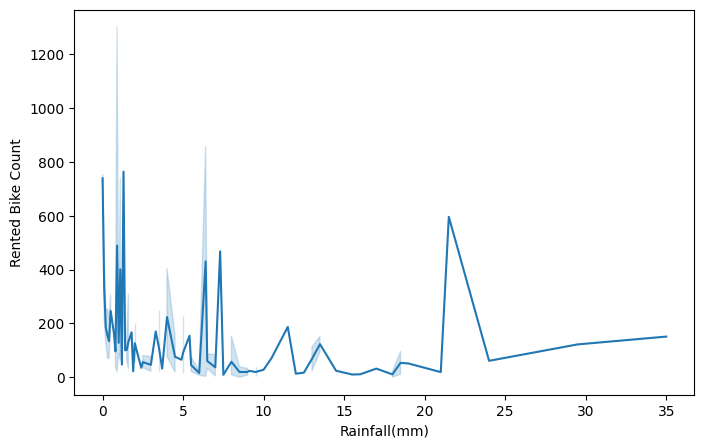

In [73]:
# Chart - 3 visualization code
# Relationship between rainfall and rented_bike_count
fig.ax=plt.subplots(figsize=(8,5))
sns.lineplot(data= df,x='Rainfall(mm)',y='Rented Bike Count')

##### 1. Why did you pick the specific chart?

how rainfall affects Rental bike count

##### 2. What is/are the insight(s) found from the chart?

With rainfal rental bike count decreases

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

this insight will be helpful for the business operation when its raining. 

#### Chart - 4

<Axes: xlabel='Temperature(°C)', ylabel='Rented Bike Count'>

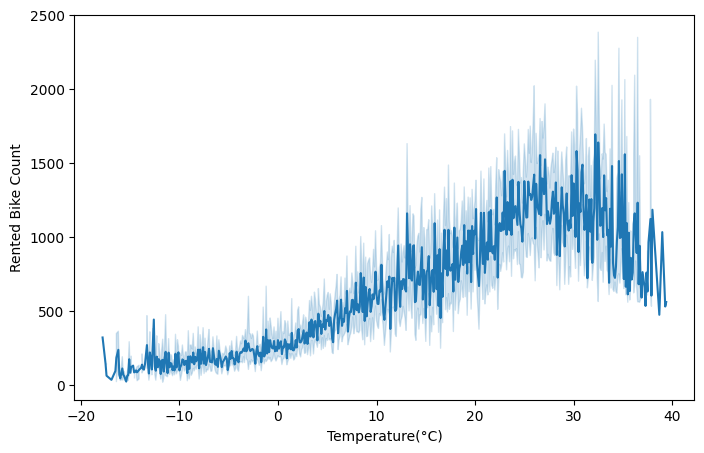

In [74]:
# Chart - 4 visualization code
# Relationship between temperature and rented_bike_count
fig.ax=plt.subplots(figsize=(8,5))
sns.lineplot(data=df,x='Temperature(°C)',y='Rented Bike Count')

##### 1. Why did you pick the specific chart?

To check relationship of teprature with rental bike count.

##### 2. What is/are the insight(s) found from the chart?

customers were using rental bike the most when temprature is between 20-30 degree celsius

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

company can use this insight to predict demand ,and to  make marketing strategies.

#### Chart - 5

<Axes: xlabel='Dew point temperature(°C)', ylabel='Rented Bike Count'>

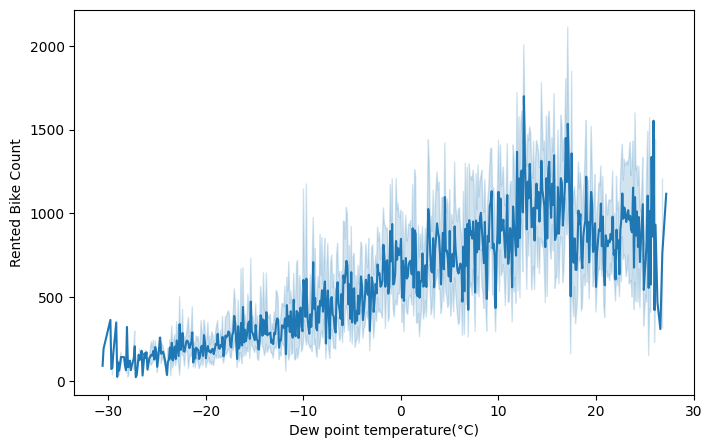

In [75]:
# Chart - 5 visualization code
# Relationship between dew_point_temp and rented_bike_count
fig.ax=plt.subplots(figsize=(8,5))
sns.lineplot(data= df,x='Dew point temperature(°C)',y='Rented Bike Count')

##### 1. Why did you pick the specific chart?

to learn the relationship between dew point temprature and rental bike counts. 

##### 2. What is/are the insight(s) found from the chart?

Demand of rental bikes increases with increase in dew point temprature.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

yes this insight is helpul for business operation and decision making.

#### Chart - 6

<Axes: xlabel='Solar Radiation (MJ/m2)', ylabel='Rented Bike Count'>

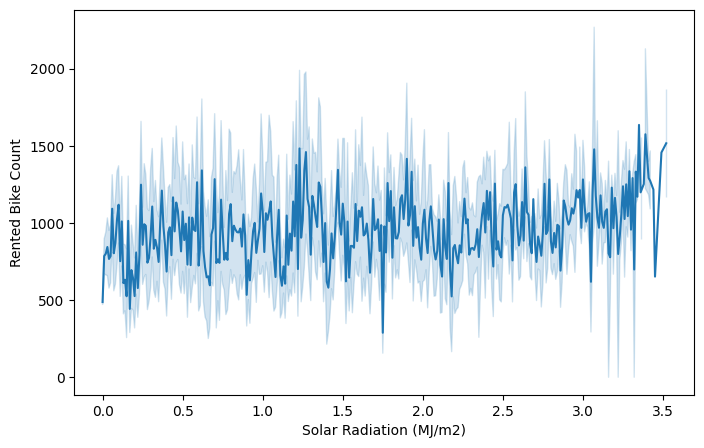

In [76]:
# Chart - 6 visualization code
# Relationship between solar_radiation and rented_bike_count
fig.ax=plt.subplots(figsize=(8,5))
sns.lineplot(data= df,x='Solar Radiation (MJ/m2)',y='Rented Bike Count')

##### 1. Why did you pick the specific chart?

to check the relationship between solar radiation and demand for rental bikes.

##### 2. What is/are the insight(s) found from the chart?

there is no affect of solar radiation on bike demand.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

No there will no impact on business 

#### Chart - 7

<Axes: xlabel='Wind speed (m/s)', ylabel='Rented Bike Count'>

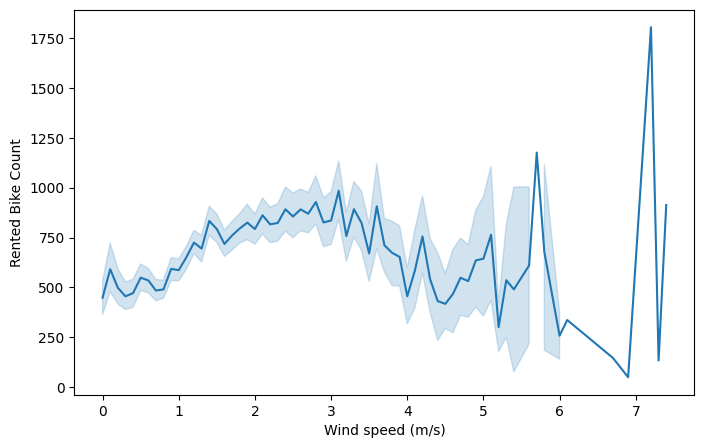

In [77]:
# Chart - 7 visualization code
# Relationship between wind_speed and rented_bike_count
fig.ax=plt.subplots(figsize=(8,5))
sns.lineplot(data= df,x='Wind speed (m/s)',y='Rented Bike Count')

##### 1. Why did you pick the specific chart?

to check relationship between wind speed and bike demand.

##### 2. What is/are the insight(s) found from the chart?

With increase in wind speed bike demand decreases.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

yes this insight is helpul for business operation and decision making.

#### Chart - 8

[Text(0.5, 1.0, 'Monthly Count of Rented Bike')]

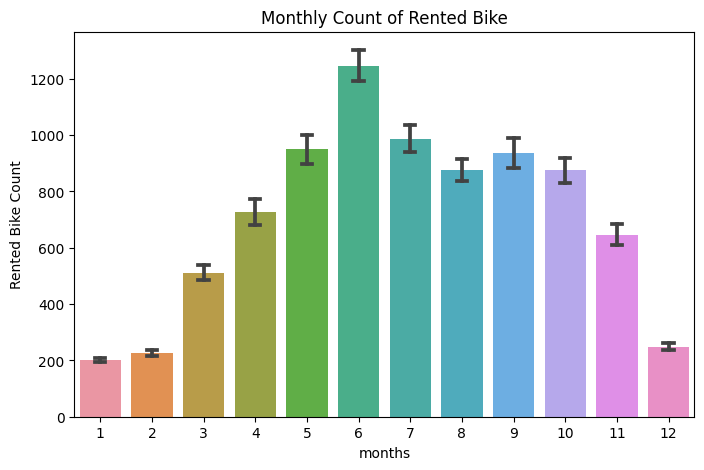

In [78]:
# Chart - 8 visualization code
# Dependent variable(rented_bike_count) plot with respect to Month
fig,ax=plt.subplots(figsize=(8,5))
df['months'] = df['Date'].dt.month
sns.barplot(data=df,x= 'months',y='Rented Bike Count',ax=ax,capsize=.2)
ax.set(title='Monthly Count of Rented Bike')



##### 1. Why did you pick the specific chart?

To see rental bike demand over months.

##### 2. What is/are the insight(s) found from the chart?

June had the highest demand in the year.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Knowing that june is the busiest month of the year, Company will work towards providing better services in the month in june.

#### Chart - 9

[Text(0.5, 1.0, 'Count of Bikes on Hourly Basis')]

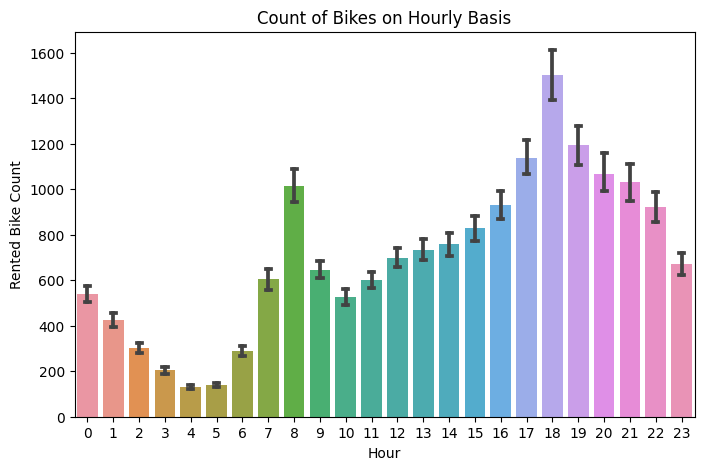

In [79]:
# Chart - 9 visualization code
# Plot count of bike on hourly basis
fig,ax=plt.subplots(figsize=(8,5))
sns.barplot(data= df,x='Hour',y='Rented Bike Count',ax=ax,capsize=.2)
ax.set(title='Count of Bikes on Hourly Basis')

##### 1. Why did you pick the specific chart?

To show the demand of bikes in a 24 hrs of the day.

##### 2. What is/are the insight(s) found from the chart?

In the evening around 6pm demand was highest after that morning 8 am was second highest.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

this insight will help in demand prediction and price prediction for the rental bikes

#### Chart - 10

[Text(0.5, 1.0, 'Count of Bikes on Hourly Basis on Weekdays & Weekend')]

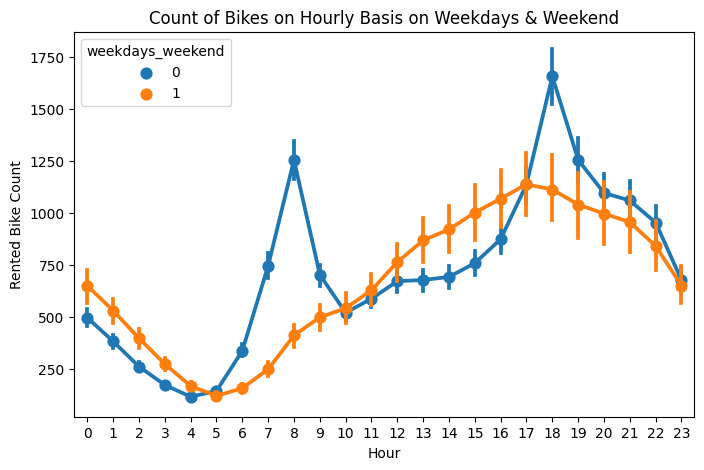

In [80]:
# Chart - 10 visualization code
# plotting comparison of bike count on hourly basis on weekdays and weekend
df['day'] = df['Date'].dt.day_name()
df['weekdays_weekend']= df['day'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )
fig,ax=plt.subplots(figsize=(8,5))
sns.pointplot(data= df,x='Hour',y='Rented Bike Count',hue='weekdays_weekend',ax=ax)
ax.set(title='Count of Bikes on Hourly Basis on Weekdays & Weekend')

##### 1. Why did you pick the specific chart?

To Compare the demand of bikes in the weekend and weekdays

##### 2. What is/are the insight(s) found from the chart?

bikes were in more demand in weekdays in the morning and in the evening.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

yes this will help in the demand prediction of bikes in the weekend.

#### Chart - 11

[Text(0.5, 1.0, 'Count of Bikes as per Seasons')]

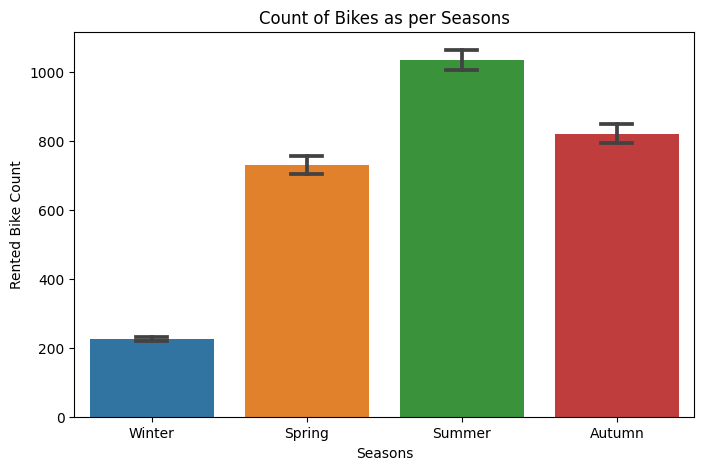

In [81]:
# Chart - 11 visualization code
# Plotting bike count as per seasons
fig,ax=plt.subplots(figsize=(8,5))
sns.barplot(data= df,x='Seasons',y='Rented Bike Count',ax=ax,capsize=.2)
ax.set(title='Count of Bikes as per Seasons')

##### 1. Why did you pick the specific chart?

to check fot the bike demand season wise.

##### 2. What is/are the insight(s) found from the chart?

Summer season had highest bike demand


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Insight will help in demand forcasting in the different seasons of the yaer

#### Chart - 12

[Text(0.5, 1.0, 'Count of Bikes as per Seasons on Hourly Basis')]

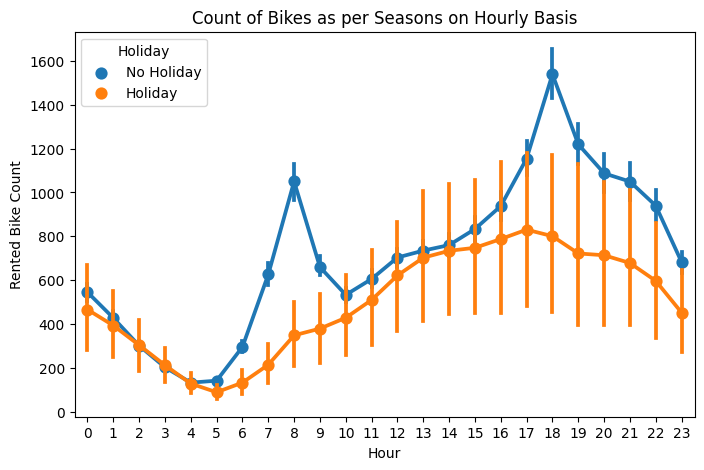

In [82]:
# Chart - 12 visualization code
# Comparing bike count on hourly basis on Holiday
fig,ax=plt.subplots(figsize=(8,5))
sns.pointplot(data= df,x='Hour',y='Rented Bike Count',hue='Holiday',ax=ax)
ax.set(title='Count of Bikes as per Seasons on Hourly Basis')

##### 1. Why did you pick the specific chart?

To compare demand of bikes in holiday vs non holiday

##### 2. What is/are the insight(s) found from the chart?

Demand in the case of non holiday was higher than the holiday.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

this insight will help in demand prediction and price prediction for the rental bikes

#### Chart - 13

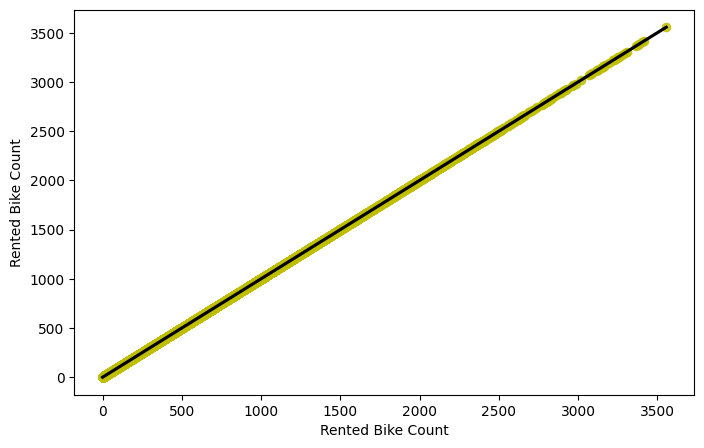

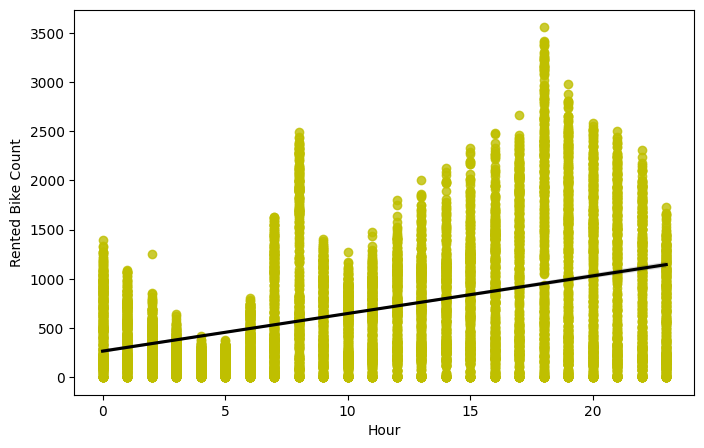

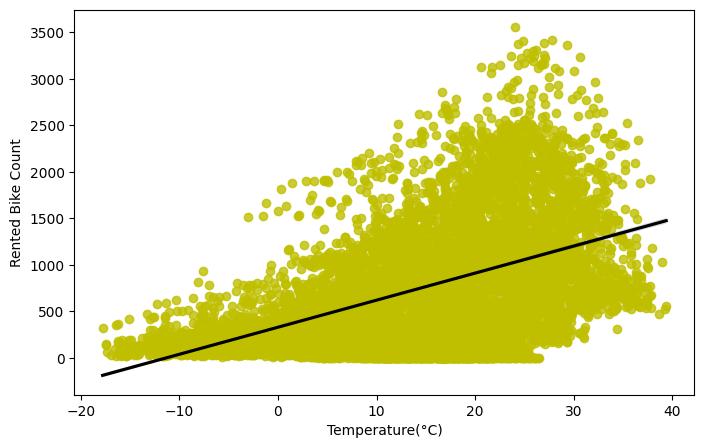

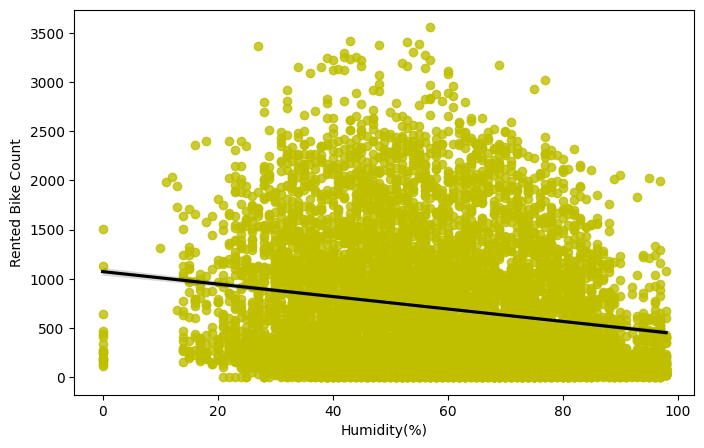

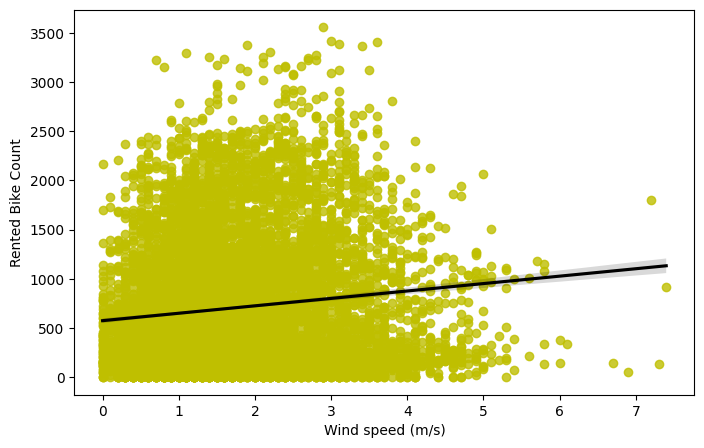

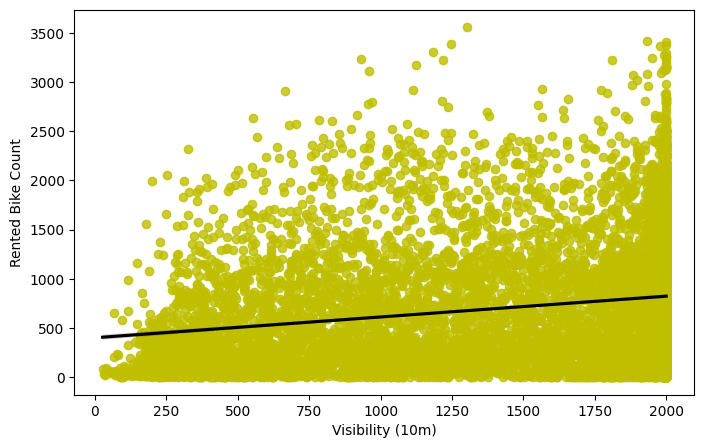

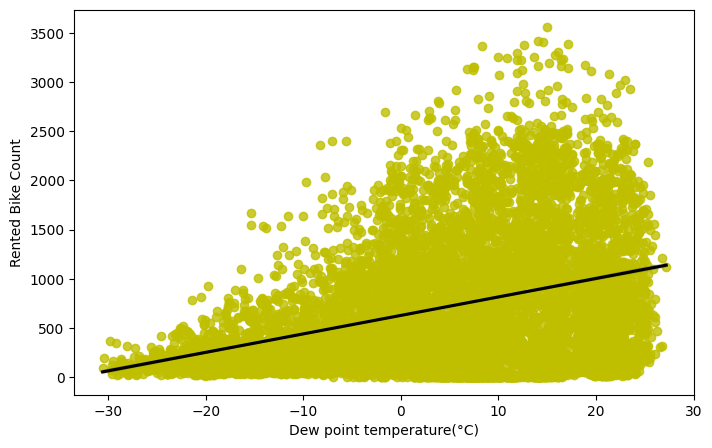

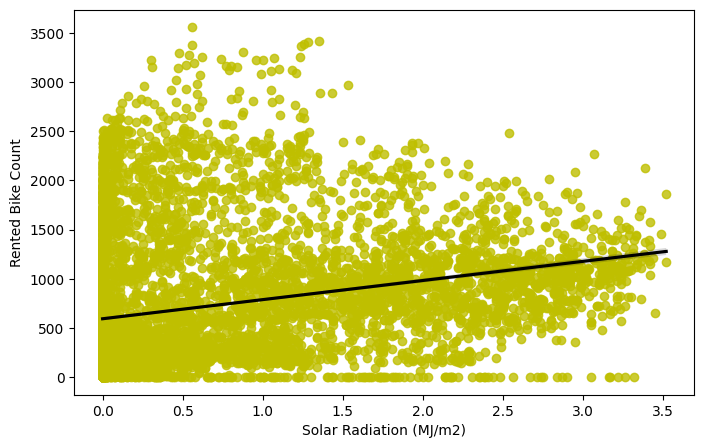

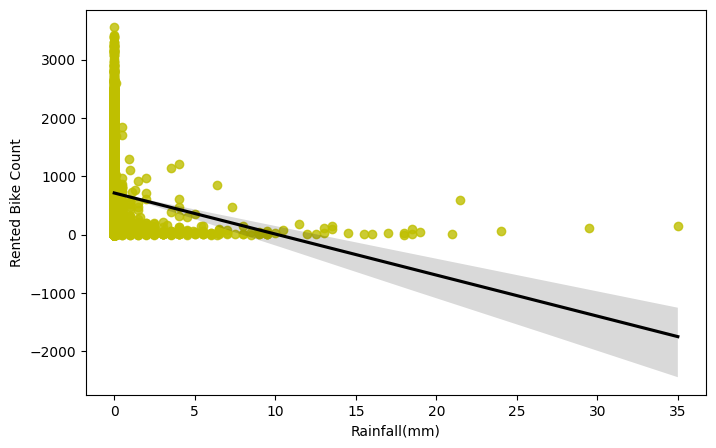

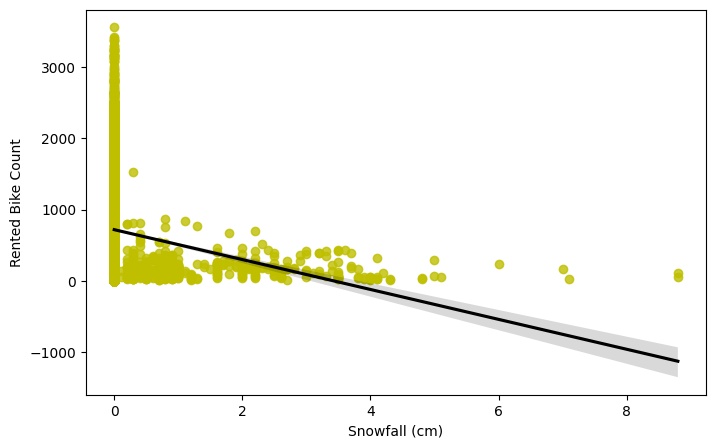

In [83]:
# Chart - 13 visualization code
# Plotting regression plot for the numerical features
for col in numerical_df:
  fig,ax=plt.subplots(figsize=(8,5))
  sns.regplot(x= df[col],y= df['Rented Bike Count'],scatter_kws={'color':'y'},line_kws={'color':'black'})

##### 1. Why did you pick the specific chart?

To see the correlation between numerical feature more clearly.

##### 2. What is/are the insight(s) found from the chart?

with increase in ranfall, snowfall or humidity bike demand decreses.

#### Chart - 14 - Correlation Heatmap

<ipython-input-84-52b6998cd143>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap="coolwarm", annot=True)


<Axes: >

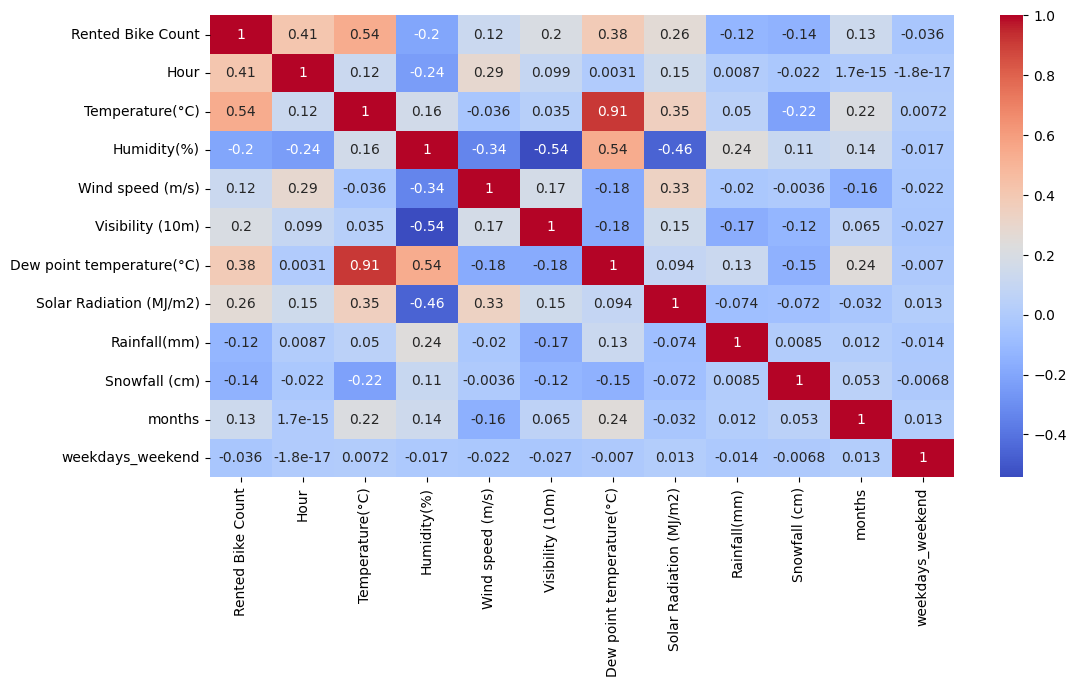

In [84]:
# Correlation Heatmap visualization code
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), cmap="coolwarm", annot=True)

##### 1. Why did you pick the specific chart?

To observe correlation between features

##### 2. What is/are the insight(s) found from the chart?

Rented bike count correlated to hour of the day and temperature.
there is a multicollinearity among the independent features temperature and dew point temperature. 

## ***5. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [85]:
# Handling Missing Values & Missing Value Imputation
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
months                       0
day                          0
weekdays_weekend             0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

there are no null values in the dataset.

### 2. Handling Outliers

<Axes: >

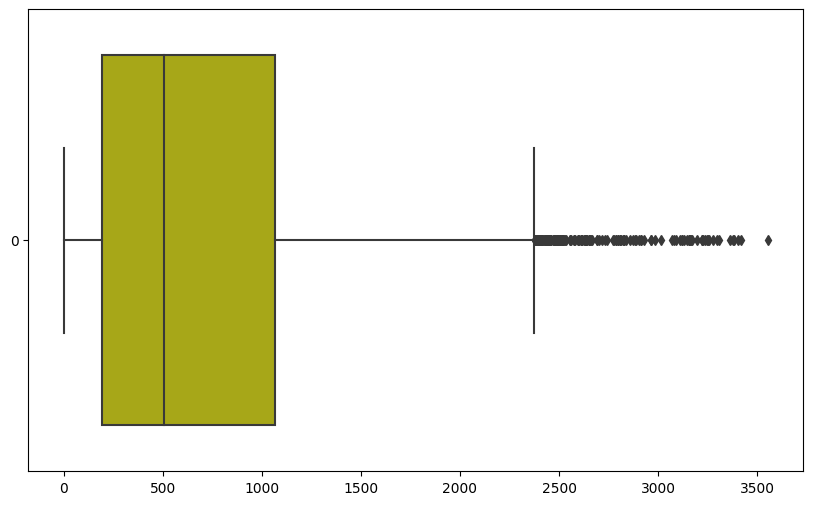

In [86]:
# checking the outlier in dataset
plt.figure(figsize=(10,6))
sns.boxplot((df['Rented Bike Count']),color="y", orient="h")

<ipython-input-87-ebdee82f53a2>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.sqrt(df['Rented Bike Count']),color="y")


<Axes: xlabel='Rented Bike Count', ylabel='Density'>

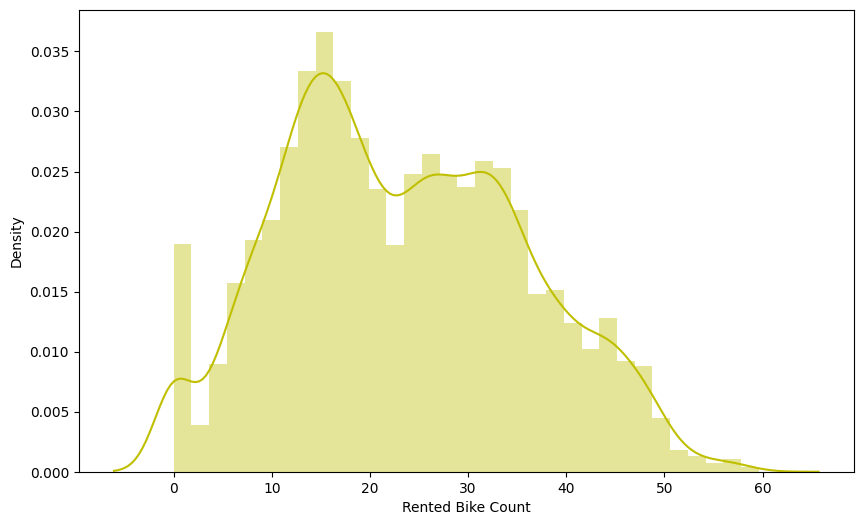

In [87]:
# Handling Outliers & Outlier treatments
plt.figure(figsize=(10,6))
sns.distplot(np.sqrt(df['Rented Bike Count']),color="y")

<Axes: >

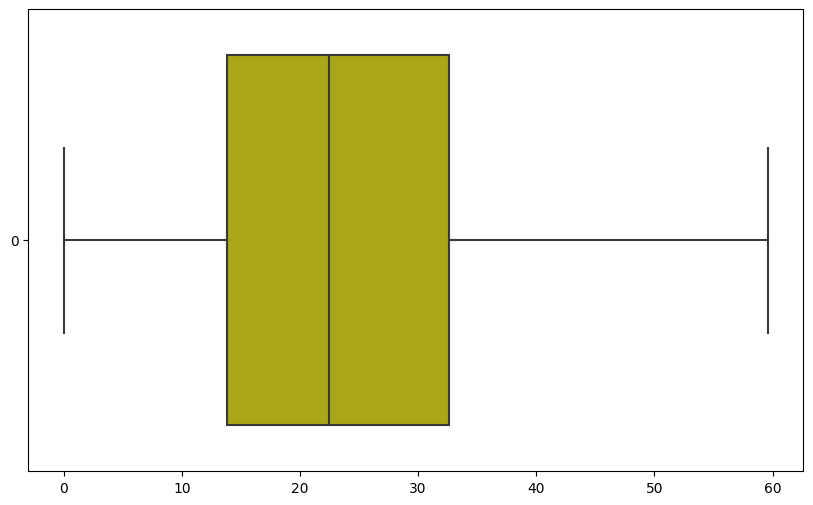

In [88]:
df['Rented Bike Count'] = np.sqrt(df['Rented Bike Count'])
plt.figure(figsize=(10,6))
sns.boxplot((df['Rented Bike Count']),color="y", orient="h")

##### What all outlier treatment techniques have you used and why did you use those techniques?

Used transformational technique to deal with the outliers in the dependent variable.

### 3. Categorical Encoding

In [89]:
# Encode your categorical columns
df_copy = df.copy()
df_copy = pd.get_dummies(df , columns = ['Hour','Seasons', 'Holiday', 'Functioning Day', 'day'])
df_copy.columns


Index(['Date', 'Rented Bike Count', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'months',
       'weekdays_weekend', 'Hour_0', 'Hour_1', 'Hour_2', 'Hour_3', 'Hour_4',
       'Hour_5', 'Hour_6', 'Hour_7', 'Hour_8', 'Hour_9', 'Hour_10', 'Hour_11',
       'Hour_12', 'Hour_13', 'Hour_14', 'Hour_15', 'Hour_16', 'Hour_17',
       'Hour_18', 'Hour_19', 'Hour_20', 'Hour_21', 'Hour_22', 'Hour_23',
       'Seasons_Autumn', 'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter',
       'Holiday_Holiday', 'Holiday_No Holiday', 'Functioning Day_No',
       'Functioning Day_Yes', 'day_Friday', 'day_Monday', 'day_Saturday',
       'day_Sunday', 'day_Thursday', 'day_Tuesday', 'day_Wednesday'],
      dtype='object')

#### What all categorical encoding techniques have you used & why did you use those techniques?

Used onehot encoding to encode the the categorical features. I used this technique because Categorical variables were having no inherent order.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [90]:
# Manipulate Features to minimize feature correlation and create new features
# dealing with the multi collinearity between temprature and dew point temprature.
df_copy.drop(['Dew point temperature(°C)','Date'] , axis = 1 , inplace = True)


#### 2. Feature Selection

In [91]:
# Select your features wisely to avoid overfitting
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)
calc_vif(df[[i for i in df.describe().columns if i not in ['Rented Bike Count', 'Hour', 'Dew point temperature(°C)'	]]])

,variables,VIF
0,Temperature(°C),3.236024
1,Humidity(%),6.107486
2,Wind speed (m/s),4.101701
3,Visibility (10m),5.138542
4,Solar Radiation (MJ/m2),2.260785
5,Rainfall(mm),1.079486
6,Snowfall (cm),1.130064
7,months,4.971429
8,weekdays_weekend,1.378111


### 8. Data Splitting

In [92]:
# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.model_selection import train_test_split

X = df_copy.drop(columns=['Rented Bike Count'],axis=1)
y = np.sqrt(df_copy['Rented Bike Count'])

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.25, random_state= 10)
print(X_train.shape)
print(X_test.shape)

(6570, 48)
(2190, 48)


## ***7. ML Model Implementation***

### ML Model - 1

In [93]:
# ML Model - 1 Implementation
# Linear regression
# Fit the Algorithm
Linear_reg = LinearRegression().fit(X_train,y_train)

# Predict on the model
y_pred_train = Linear_reg.predict(X_train)
y_pred_test = Linear_reg.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [94]:

# Evaluation of  metrics on train data
MSE = mean_squared_error((y_train), (y_pred_train))
print('MSE:',MSE)

#  Mean Absolute Error(MAE)
MAE = mean_absolute_error(y_train,y_pred_train)
print('MAE:',MAE)

#  Root Mean Square Error(RMSE)
RMSE = np.sqrt(MSE)
print('RMSE:',RMSE)

#  r2 and adjusted r2 score
r2 = r2_score(y_train,y_pred_train)
print('R2:',r2)
Adjusted_R2 = (1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print('Adjusted R2:',1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

# Storing the metrics in dictionary for comparision later
dict_1 = {'Model':'Linear regression',
          'MSE': round((MSE),2),
          'MAE': round((MAE),2),
          'RMSE': round((RMSE),2),
          'R2': round((r2),2),
          'Adjusted R2':round((Adjusted_R2),2)
          }         
train_df = pd.DataFrame(dict_1,index=[1])

MSE: 0.4143398196973295
MAE: 0.4752099817418903
RMSE: 0.6436923331043563
R2: 0.8129959365465119
Adjusted R2: 0.8088034120038835


In [95]:
# Evaluation of  metrics on test data
# Mean Square Error(MSE)
MSE = mean_squared_error((y_test), (y_pred_test))
print('MSE:',MSE)

# Mean Absolute Error(MAE)
MAE = mean_absolute_error(y_test,y_pred_test)
print('MAE:',MAE)

# Root Mean Square Error(RMSE)
RMSE = np.sqrt(MSE)
print('RMSE:',RMSE)

# r2 and adjusted r2 score
r2 = r2_score(y_test,y_pred_test)
print('R2:',r2)
Adjusted_R2 = (1-(1-r2_score(y_test, y_pred_test))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print('Adjusted R2:',1-(1-r2_score(y_test, y_pred_test))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

# Storing the metrics in dictionary for comparision late
dict_2 = {'Model':'Linear regression',
          'MSE': round((MSE),2),
          'MAE': round((MAE),2),
          'RMSE': round((RMSE),2),
          'R2': round((r2),2),
          'Adjusted R2':round((Adjusted_R2),2)
          }   
test_df = pd.DataFrame(dict_2,index=[1])  

MSE: 0.3960393331229251
MAE: 0.47235175517514477
RMSE: 0.6293165603437789
R2: 0.8330145964660929
Adjusted R2: 0.8292708788716849


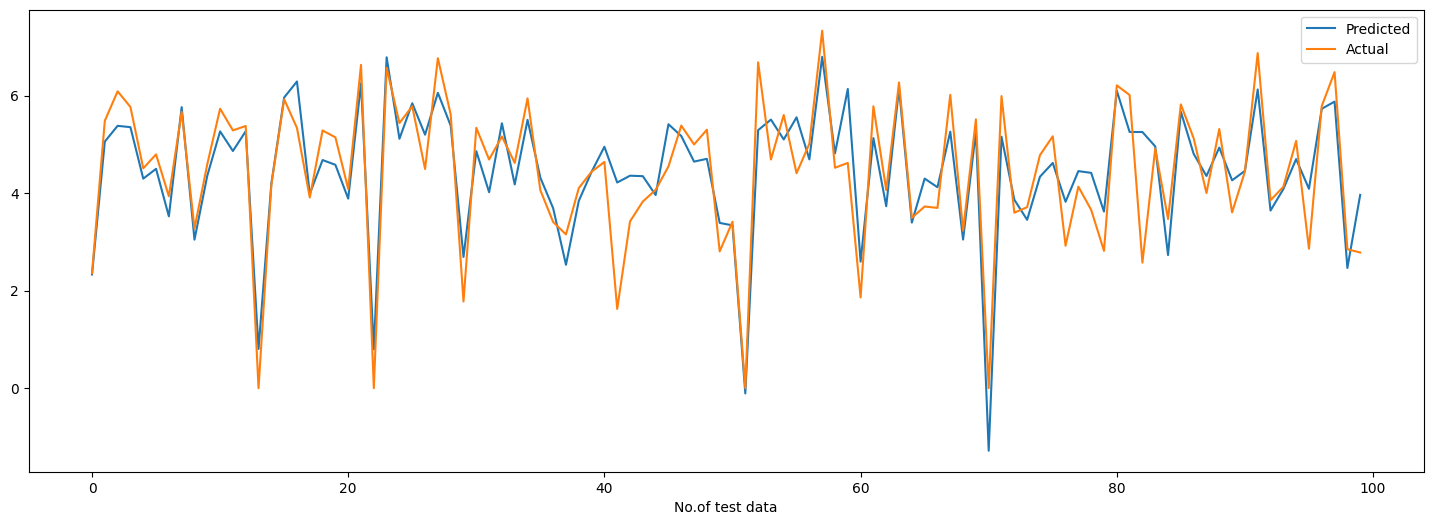

In [96]:
# Plot between actual and predicted values
plt.figure(figsize=(18,6))
plt.plot(y_pred_test[0:100])
plt.plot(np.array(y_test[0:100]))
plt.legend(['Predicted','Actual'])
plt.xlabel('No.of test data')
plt.show()

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [97]:
# Ridge Regression
# Apply the model and check the score
ridge = Ridge(alpha=0.1)
ridge.fit(X_train,y_train)
ridge.score(X_train,y_train)

0.8129958888609539

#### 2. Cross- Validation & Hyperparameter Tuning

In [98]:

# Fit the Algorithm
ridge_model = Ridge()
parameters_r = {'alpha': [1e-20,1e-15,1e-10,1e-7,1e-8,1e-9,1e-6,2,3,11,21,33,42,49,57,59,64,111]}
ridge_regressor = GridSearchCV(ridge_model,parameters_r,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X_train,y_train)
best_model_ridge = ridge_regressor.best_estimator_
# Predict on the model
y_pred_train_ridge = best_model_ridge.predict(X_train)
y_pred_test_ridge = best_model_ridge.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.58047e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.5405e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.49387e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.50753e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning

In [99]:
# Evaluation of  metrics on train data
# Mean Square Error
MSE_ridge= mean_squared_error((y_train), (y_pred_train_ridge))
print('MSE:',MSE_ridge)

# Mean Absolute Error(MAE)
MAE_ridge = mean_absolute_error(y_train, y_pred_train_ridge)
print('MAE:', MAE_ridge)

# Root Mean Square Error(RMSE)
RMSE_ridge = np.sqrt(MSE_ridge)
print('RMSE:', RMSE_ridge)

# r2 and adjusted r2
r2_ridge = r2_score(y_train,y_pred_train_ridge)
print('R2:',r2_ridge)
Adjusted_R2_ridge = (1-(1-r2_score(y_train,y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print('Adjusted_R2_ridge:',1-(1-r2_score(y_train,y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

# Storing the metrics in dictionary for comparision late
dict_train = {'Model':'Ridge regression',
          'MSE': round((MSE_ridge),2),
          'MAE': round((MAE_ridge),2),
          'RMSE': round((RMSE_ridge),2),
          'R2': round((r2_ridge),2),
          'Adjusted R2':round((Adjusted_R2_ridge),2)
          }   
train_df = train_df.append(dict_train,ignore_index=True)

MSE: 0.4143398196669302
MAE: 0.4752099287461587
RMSE: 0.643692333080743
R2: 0.8129959365602321
Adjusted_R2_ridge: 0.8088034120179113


<ipython-input-99-c6f48e0c5b5c>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(dict_train,ignore_index=True)


In [100]:
# Evaluation of  metrics on test data
# Mean Square Error
MSE_ridge= mean_squared_error((y_test), (y_pred_test_ridge))
print('MSE:',MSE_ridge)

# Mean Absolute Error(MAE)
MAE_ridge = mean_absolute_error(y_test, y_pred_test_ridge)
print('MAE:', MAE_ridge)

#  Root Mean Square Error(RMSE)
RMSE_ridge = np.sqrt(MSE_ridge)
print('RMSE:', RMSE_ridge)

# r2 and adjusted r2
r2_ridge = r2_score(y_test,y_pred_test_ridge)
print('R2:',r2_ridge)
Adjusted_R2_ridge = (1-(1-r2_score(y_test,y_pred_test_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print('Adjusted_R2_ridge:',1-(1-r2_score(y_test,y_pred_test_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

# Storing the metrics in dictionary for comparision late
dict_test = {'Model':'Ridge regression',
          'MSE': round((MSE_ridge),2),
          'MAE': round((MAE_ridge),2),
          'RMSE': round((RMSE_ridge),2),
          'R2': round((r2_ridge),2),
          'Adjusted R2':round((Adjusted_R2_ridge),2)
          }   
test_df = test_df.append(dict_test ,ignore_index=True)

MSE: 0.3960393333493866
MAE: 0.47235167767941144
RMSE: 0.6293165605237054
R2: 0.833014596370608
Adjusted_R2_ridge: 0.8292708787740593


<ipython-input-100-a0ecd0ea6f49>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_df = test_df.append(dict_test ,ignore_index=True)


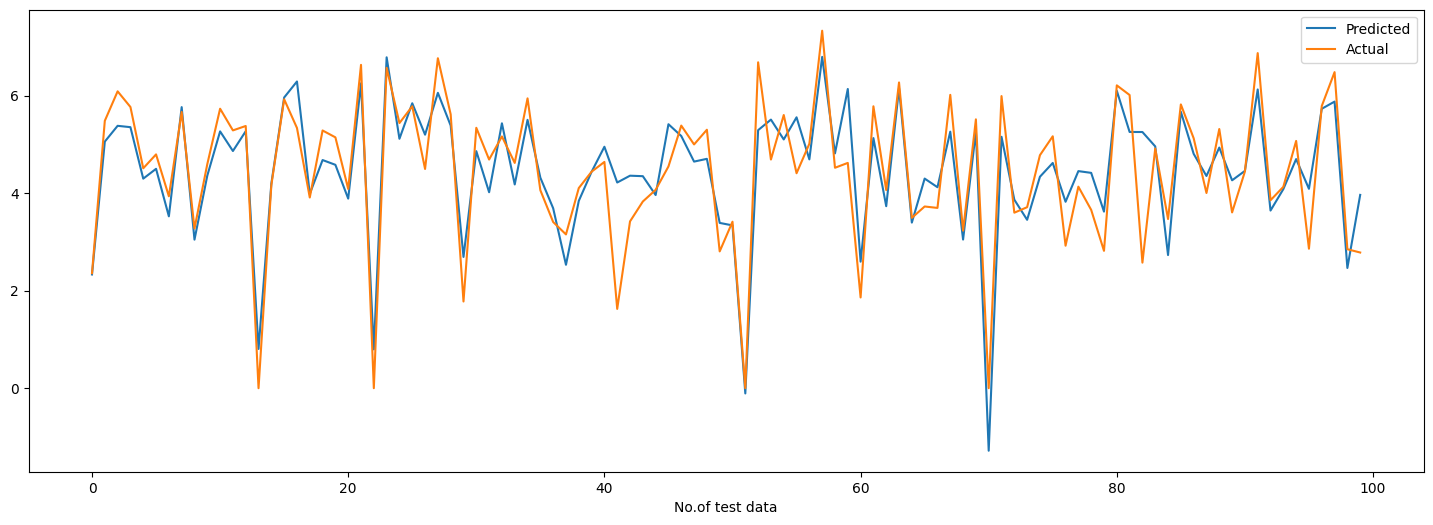

In [101]:
# Plot between actual and predicted value
plt.figure(figsize=(18,6))
plt.plot(y_pred_test_ridge[0:100])
plt.plot(np.array(y_test[0:100]))
plt.legend(['Predicted','Actual'])
plt.xlabel('No.of test data')
plt.show()

### ML Model - 3

In [102]:

#  Lasso regression implementation
lasso = Lasso(alpha=0.001,max_iter=3000) 

# Fit the Algorithm
lasso.fit(X_train,y_train)
print(lasso.score(X_train,y_train),lasso.score(X_test,y_test))


0.8125208967778985 0.8326284851098507


#### 2. Cross- Validation & Hyperparameter Tuning

In [103]:

# Fit the Algorithm
lasso_model = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_regressor = GridSearchCV(lasso_model,parameters,scoring='neg_mean_squared_error',cv=5)
lasso_regressor.fit(X_train,y_train)



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.755e+02, tolerance: 1.157e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.735e+02, tolerance: 1.155e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.821e+02, tolerance: 1.186e

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             scoring='neg_mean_squared_error')

In [104]:
print('The best fit of alpha value is:' ,lasso_regressor.best_params_)
best_model_lasso =lasso_regressor.best_estimator_
# Predict on the model
y_pred_train_lasso = best_model_lasso.predict(X_train)
y_pred_test_lasso = best_model_lasso.predict(X_test) 

The best fit of alpha value is: {'alpha': 1e-05}


In [105]:
# Evaluation of  metrics on train data
# Mean Square Error
MSE_lasso= mean_squared_error((y_train), (y_pred_train_lasso))
print('MSE:',MSE_lasso)

# Mean Absolute Error(MAE)
MAE_lasso = mean_absolute_error(y_train, y_pred_train_lasso)
print('MAE:', MAE_lasso)

# Root Mean Square Error(RMSE)
RMSE_lasso = np.sqrt(MSE_lasso)
print('RMSE:', RMSE_lasso)

#  r2 and adjusted r2
r2_lasso = r2_score(y_train,y_pred_train_lasso)
print('R2:',r2_lasso)
Adjusted_R2_lasso = (1-(1-r2_score(y_train,y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print('Adjusted_R2_lasso:',1-(1-r2_score(y_train,y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

# Storing the metrics values for later comparisons
dict_1 = {'Model':'Lasso regression',
          'MSE': round((MSE_lasso),2),
          'MAE': round((MAE_lasso),2),
          'RMSE': round((RMSE_lasso),2),
          'R2': round((r2_lasso),2),
          'Adjusted R2':round((Adjusted_R2_lasso),2)
          }   
train_df = train_df.append(dict_1,ignore_index=True)

MSE: 0.41433992492036203
MAE: 0.4752052926638195
RMSE: 0.6436924148383
R2: 0.8129958890561821
Adjusted_R2_lasso: 0.8088033634488476


<ipython-input-105-a5b5dcc14800>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(dict_1,ignore_index=True)


In [106]:
# Calculate values on test data
# Calculate Mean Square Error
MSE_lasso= mean_squared_error((y_test), (y_pred_test_lasso))
print('MSE:',MSE_lasso)

# Calculate Mean Absolute Error(MAE)
MAE_lasso = mean_absolute_error(y_test, y_pred_test_lasso)
print('MAE:', MAE_lasso)

# Calculate Root Mean Square Error(RMSE)
RMSE_lasso = np.sqrt(MSE_lasso)
print('RMSE:', RMSE_lasso)

# Calculate r2 and adjusted r2
r2_lasso = r2_score(y_test,y_pred_test_lasso)
print('R2:',r2_lasso)
Adjusted_R2_lasso = (1-(1-r2_score(y_test,y_pred_test_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print('Adjusted_R2_lasso:',1-(1-r2_score(y_test,y_pred_test_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

# Storing the test metrics values for later comparisons
dict_2 = {'Model':'Lasso regression',
          'MSE': round((MSE_lasso),2),
          'MAE': round((MAE_lasso),2),
          'RMSE': round((RMSE_lasso),2),
          'R2': round((r2_lasso),2),
          'Adjusted R2':round((Adjusted_R2_lasso),2)
          }   
test_df = test_df.append(dict_2,ignore_index=True)

MSE: 0.3960325904228876
MAE: 0.4723390005856339
RMSE: 0.6293112031601595
R2: 0.833017439447566
Adjusted_R2_lasso: 0.8292737855911826


<ipython-input-106-6c73d7fe1f62>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_df = test_df.append(dict_2,ignore_index=True)


In [107]:
# applying Elastic net
elasticnet = ElasticNet(alpha=0.1,l1_ratio=0.5)
elasticnet.fit(X_train,y_train)
elasticnet.score(X_train,y_train)

0.52582116317696

In [108]:
enet_model = ElasticNet()
parameters = {'alpha': np.logspace(-4, 0, 10),'l1_ratio':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}
elastic_regressor = GridSearchCV(enet_model,parameters,scoring='neg_mean_squared_error',cv=5)
elastic_regressor.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.128e+00, tolerance: 1.157e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.505e+00, tolerance: 1.155e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.493e+00, tolerance: 1.186e

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': array([1.00000000e-04, 2.78255940e-04, 7.74263683e-04, 2.15443469e-03,
       5.99484250e-03, 1.66810054e-02, 4.64158883e-02, 1.29154967e-01,
       3.59381366e-01, 1.00000000e+00]),
                         'l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                      0.9]},
             scoring='neg_mean_squared_error')

In [109]:
print('The best fit of alpha value is:' ,elastic_regressor.best_params_)
# Get the X_train and X_test value
best_model_elastic = elastic_regressor.best_estimator_
y_pred_train_enet = best_model_elastic.predict(X_train)
y_pred_test_enet = best_model_elastic.predict(X_test)
elastic_regressor.score(X_train,y_train)

The best fit of alpha value is: {'alpha': 0.0002782559402207126, 'l1_ratio': 0.2}


-0.41437684475168535

In [110]:
# Calculate values on train data
# Mean Square Error(MSE)
MSE_enet= mean_squared_error((y_train), (y_pred_train_enet))
print('MSE:',MSE_enet)

# Calculate Mean Absolute Error(MAE)
MAE_enet = mean_absolute_error(y_train, y_pred_train_enet)
print('MAE:', MAE_enet)

# Calculate Root Mean Square Error(RMSE)
RMSE_enet = np.sqrt(MSE_enet)
print('RMSE:', RMSE_enet)

# Calculate r2 and adjusted r2
r2_enet = r2_score(y_train,y_pred_train_enet)
print('R2:',r2_enet)
Adjusted_R2_enet = (1-(1-r2_score(y_train,y_pred_train_enet))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print('Adjusted_R2_enet:',1-(1-r2_score(y_train,y_pred_train_enet))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

# Storing the metrics values for later comparisons
dict_1 = {'Model':'Elastic net regression',
          'MSE': round((MSE_enet),2),
          'MAE': round((MAE_enet),2),
          'RMSE': round((RMSE_enet),2),
          'R2': round((r2_enet),2),
          'Adjusted R2':round((Adjusted_R2_enet),2)
          }   
train_df = train_df.append(dict_1,ignore_index=True)    

MSE: 0.41437684475168535
MAE: 0.4754571351484495
RMSE: 0.6437210923619681
R2: 0.8129792260222394
Adjusted_R2_enet: 0.8087863268391788


<ipython-input-110-2d8f3a6bb27b>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(dict_1,ignore_index=True)


In [111]:
# Calculate values on test data
# Mean Square Error(MSE)
MSE_enet= mean_squared_error((y_test), (y_pred_test_enet))
print('MSE:',MSE_enet)

# Calculate Mean Absolute Error(MAE)
MAE_enet = mean_absolute_error(y_test, y_pred_test_enet)
print('MAE:', MAE_enet)

# Calculate Root Mean Square Error(RMSE)
RMSE_enet = np.sqrt(MSE_enet)
print('RMSE:', RMSE_enet)

# Calculate r2 and adjusted r2
r2_enet = r2_score(y_test,y_pred_test_enet)
print('R2:',r2_enet)
Adjusted_R2_enet = (1-(1-r2_score(y_test,y_pred_test_enet))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print('Adjusted_R2_enet:',1-(1-r2_score(y_test,y_pred_test_enet))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
# Storing the test metrics values for later comparisons
dict_2 = {'Model':'Elastic net regression',
          'MSE': round((MSE_enet),2),
          'MAE': round((MAE_enet),2),
          'RMSE': round((RMSE_enet),2),
          'R2': round((r2_enet),2),
          'Adjusted R2':round((Adjusted_R2_enet),2)
          }   
test_df = test_df.append(dict_2,ignore_index=True)

MSE: 0.39608883307857223
MAE: 0.4725506021932931
RMSE: 0.6293558874584174
R2: 0.8329937253823966
Adjusted_R2_enet: 0.829249539870185


<ipython-input-111-0cbdef3eafde>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_df = test_df.append(dict_2,ignore_index=True)


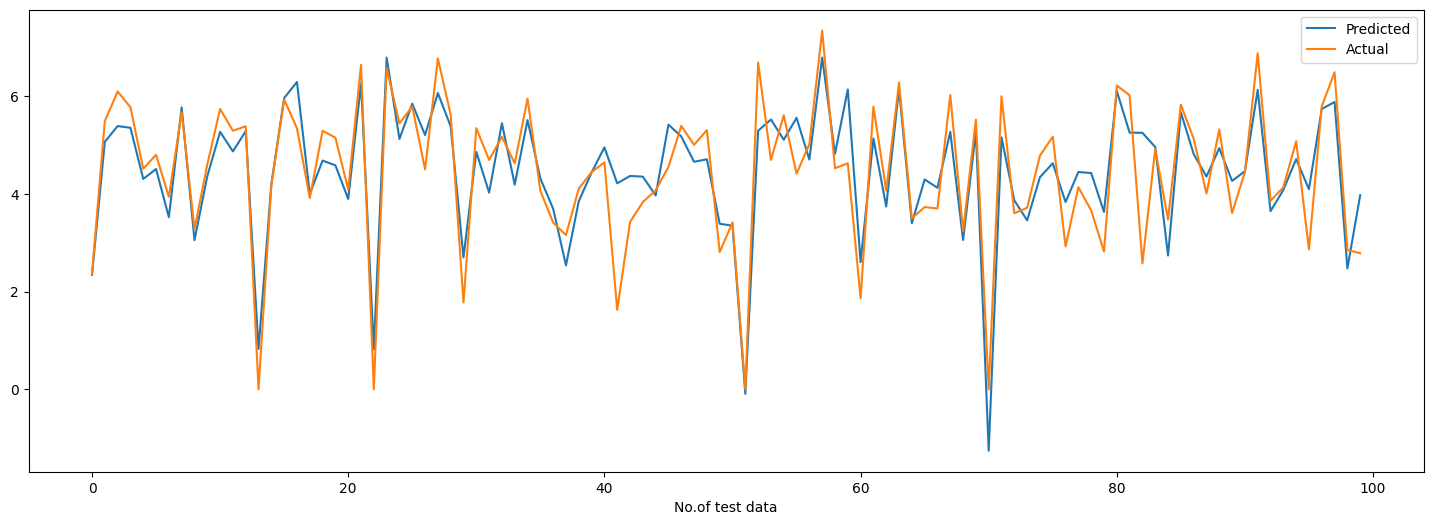

In [112]:
# Plot between actual and predicted value
plt.figure(figsize=(18,6))
plt.plot(y_pred_test_enet[0:100])
plt.plot(np.array(y_test[0:100]))
plt.legend(['Predicted','Actual'])
plt.xlabel('No.of test data')
plt.show()

In [113]:
# Fit the model and check the score
decision_tree = DecisionTreeRegressor(criterion='squared_error',max_depth=8,
                max_features=9,max_leaf_nodes=100,)
decision_tree.fit(X_train,y_train)
decision_tree.score(X_train,y_train)

0.6194616442685243

In [114]:
# Get the X_train and X_test value
y_pred_train_decision = decision_tree.predict(X_train)
y_pred_test_decision = decision_tree.predict(X_test)

In [115]:
# Check the values on train dataset
# Calculate Mean Square Error
MSE_decision= mean_squared_error((y_train), (y_pred_train_decision))
print('MSE:',MSE_decision)

# Calculate Mean Absolute Error(MAE)
MAE_decision = mean_absolute_error(y_train, y_pred_train_decision)
print('MAE:', MAE_decision)

# Calculate Root Mean Square Error(RMSE)
RMSE_decision = np.sqrt(MSE_decision)
print('RMSE:', RMSE_decision)

# Calculate r2 and adjusted r2
r2_decision = r2_score(y_train,y_pred_train_decision)
print('R2:',r2_decision)
Adjusted_R2_decision = (1-(1-r2_score(y_train,y_pred_train_decision))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print('Adjusted_R2_decision:',1-(1-r2_score(y_train,y_pred_train_decision))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

# Storing the metrics values for later comparison
dict_1 = {'Model':'Decision tree regression',
          'MSE': round((MSE_decision),2),
          'MAE': round((MAE_decision),2),
          'RMSE': round((RMSE_decision),2),
          'R2': round((r2_decision),2),
          'Adjusted R2':round((Adjusted_R2_decision),2)
          }   
train_df = train_df.append(dict_1,ignore_index=True)

MSE: 0.843148489877143
MAE: 0.6104913001242027
RMSE: 0.9182311745291286
R2: 0.6194616442685243
Adjusted_R2_decision: 0.6109301911741242


<ipython-input-115-4e83fde22f0d>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(dict_1,ignore_index=True)


In [116]:
# Check the values on test dataset
# Calculate Mean Square Error
MSE_decision= mean_squared_error((y_test), (y_pred_test_decision))
print('MSE:',MSE_decision)

# Calculate Mean Absolute Error(MAE)
MAE_decision = mean_absolute_error(y_test, y_pred_test_decision)
print('MAE:', MAE_decision)

# Calculate Root Mean Square Error(RMSE)
RMSE_decision = np.sqrt(MSE_decision)
print('RMSE:', RMSE_decision)

# Calculate r2 and adjusted r2
r2_decision = r2_score(y_test,y_pred_test_decision)
print('R2:',r2_decision)
Adjusted_R2_decision = (1-(1-r2_score(y_test,y_pred_test_decision))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print('Adjusted_R2_decision:',1-(1-r2_score(y_test,y_pred_test_decision))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
# Stroing the test metrics values for later comparison
dict_2 = {'Model':'Decision tree regression',
          'MSE': round((MSE_decision),2),
          'MAE': round((MAE_decision),2),
          'RMSE': round((RMSE_decision),2),
          'R2': round((r2_decision),2),
          'Adjusted R2':round((Adjusted_R2_decision),2)
          }   
test_df = test_df.append(dict_2,ignore_index=True)


MSE: 1.0052272083581872
MAE: 0.6586979585245002
RMSE: 1.0026101976133033
R2: 0.5761575757960034
Adjusted_R2_decision: 0.5666552701622847


<ipython-input-116-464fffbbc1f1>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_df = test_df.append(dict_2,ignore_index=True)


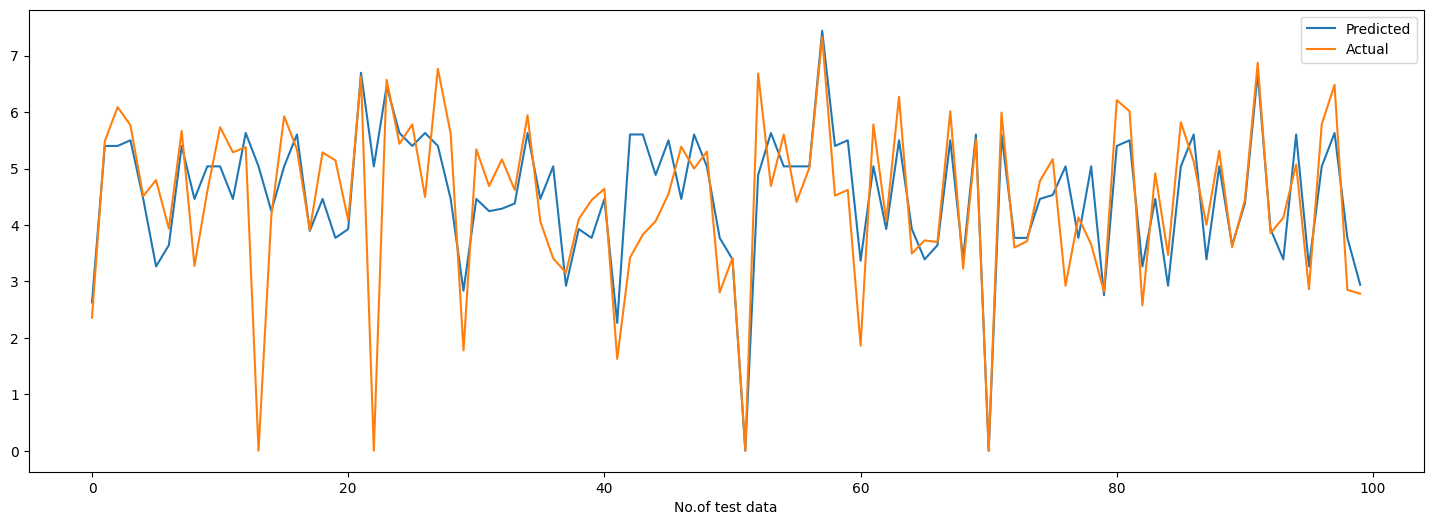

In [117]:
# Plot between actual and predicted value
plt.figure(figsize=(18,6))
plt.plot(y_pred_test_decision[0:100])
plt.plot(np.array(y_test[0:100]))
plt.legend(['Predicted','Actual'])
plt.xlabel('No.of test data')
plt.show()

In [118]:
# Number of trees in random forest
n_estimators = [60,100,150]

# Maximum number of levels in tree
max_depth = [5,7,9]

# Minimum number of samples required to split a node
min_samples_split = [150,180,250]

# Minimum number of samples required at each leaf node
min_samples_leaf = [80,90]

# Hyperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

# Use the random grid to search for best hyperparameters
#First create the base model to tune
rfr_model = RandomForestRegressor()

# Random search of parameters,using 3 fold CV 
rfr_grid = GridSearchCV(estimator=rfr_model,
                       param_grid = param_dict,
                       cv = 3, verbose = 2)

# Fit the random search model
rfr_grid.fit(X_train,y_train)

Fitting 3 folds for each of 54 candidates, totalling 162 fits
[CV] END max_depth=5, min_samples_leaf=80, min_samples_split=150, n_estimators=60; total time=   0.6s
[CV] END max_depth=5, min_samples_leaf=80, min_samples_split=150, n_estimators=60; total time=   0.5s
[CV] END max_depth=5, min_samples_leaf=80, min_samples_split=150, n_estimators=60; total time=   0.6s
[CV] END max_depth=5, min_samples_leaf=80, min_samples_split=150, n_estimators=100; total time=   0.9s
[CV] END max_depth=5, min_samples_leaf=80, min_samples_split=150, n_estimators=100; total time=   0.9s
[CV] END max_depth=5, min_samples_leaf=80, min_samples_split=150, n_estimators=100; total time=   0.9s
[CV] END max_depth=5, min_samples_leaf=80, min_samples_split=150, n_estimators=150; total time=   1.4s
[CV] END max_depth=5, min_samples_leaf=80, min_samples_split=150, n_estimators=150; total time=   2.0s
[CV] END max_depth=5, min_samples_leaf=80, min_samples_split=150, n_estimators=150; total time=   2.1s
[CV] END max_d

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 7, 9], 'min_samples_leaf': [80, 90],
                         'min_samples_split': [150, 180, 250],
                         'n_estimators': [60, 100, 150]},
             verbose=2)

In [119]:
best_model_rfr = rfr_grid.best_estimator_

In [120]:
# Get the X_train and X_test value
y_pred_train_randomforest =best_model_rfr.predict(X_train)
y_pred_test_randomforest = best_model_rfr.predict(X_test)

# Check the values on train dataset
# Mean Square Error
MSE_randomforest= mean_squared_error((y_train), (y_pred_train_randomforest))
print('MSE:',MSE_randomforest)

# Mean Absolute Error(MAE)
MAE_randomforest = mean_absolute_error(y_train, y_pred_train_randomforest)
print('MAE:', MAE_randomforest)

#  Root Mean Square Error(RMSE)
RMSE_randomforest = np.sqrt(MSE_randomforest)
print('RMSE:', RMSE_randomforest)

# r2 and adjusted r2
r2_randomforest = r2_score(y_train,y_pred_train_randomforest)
print('R2:',r2_randomforest)
Adjusted_R2_randomforest = (1-(1-r2_score(y_train,y_pred_train_randomforest))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print('Adjusted_R2_randomforest:',1-(1-r2_score(y_train,y_pred_train_randomforest))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

# Stroing the metrics values for later comparison
dict_1 = {'Model':'Random forest regression',
          'MSE': round((MSE_randomforest),2),
          'MAE': round((MAE_randomforest),2),
          'RMSE': round((RMSE_randomforest),2),
          'R2': round((r2_randomforest),2),
          'Adjusted R2':round((Adjusted_R2_randomforest),2)
          }   
train_df = train_df.append(dict_1,ignore_index=True)

MSE: 0.39938723209023086
MAE: 0.4728436945605331
RMSE: 0.6319709107943425
R2: 0.819744490532258
Adjusted_R2_randomforest: 0.8157032647244804


<ipython-input-120-bd735e8cb910>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(dict_1,ignore_index=True)


In [121]:
# Check the values on test dataset
#  Mean Square Error
MSE_randomforest= mean_squared_error((y_test), (y_pred_test_randomforest))
print('MSE:',MSE_randomforest)

#  Mean Absolute Error(MAE)
MAE_randomforest = mean_absolute_error(y_test, y_pred_test_randomforest)
print('MAE:', MAE_randomforest)

# Root Mean Square Error(RMSE)
RMSE_randomforest = np.sqrt(MSE_randomforest)
print('RMSE:', RMSE_randomforest)

# r2 and adjusted r2
r2_randomforest = r2_score(y_test,y_pred_test_randomforest)
print('R2:',r2_randomforest)
Adjusted_R2_randomforest = (1-(1-r2_score(y_test,y_pred_test_randomforest))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print('Adjusted_R2_randomforest:',1-(1-r2_score(y_test,y_pred_test_randomforest))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

# Stroing the metrics values for later comparison
dict_2 = {'Model':'Random forest regression',
          'MSE': round((MSE_randomforest),2),
          'MAE': round((MAE_randomforest),2),
          'RMSE': round((RMSE_randomforest),2),
          'R2': round((r2_randomforest),2),
          'Adjusted R2':round((Adjusted_R2_randomforest),2)
          }   
test_df = test_df.append(dict_2,ignore_index=True)

MSE: 0.4195657006076775
MAE: 0.4895135646712061
RMSE: 0.6477389139210933
R2: 0.8230949757628913
Adjusted_R2_randomforest: 0.8191288659247871


<ipython-input-121-f2eda772ca1d>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_df = test_df.append(dict_2,ignore_index=True)


In [122]:
best_model = rfr_grid.best_estimator_
best_model.feature_importances_

array([2.84074951e-01, 1.19318316e-01, 1.77394460e-03, 1.81198444e-03,
       5.20745836e-02, 4.46307075e-02, 0.00000000e+00, 2.97009096e-03,
       3.37996618e-04, 2.22706482e-03, 0.00000000e+00, 2.73025149e-04,
       4.27267495e-04, 5.65223442e-04, 6.82249936e-04, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.20921801e-04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 3.70553100e-03, 1.35209229e-02,
       4.09899644e-03, 1.93170640e-04, 1.60202517e-02, 1.34662598e-02,
       4.05050771e-03, 2.89143870e-02, 1.34776122e-03, 2.24862817e-04,
       4.66513106e-04, 0.00000000e+00, 0.00000000e+00, 2.14484447e-01,
       1.88189653e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.84079090e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

In [123]:
importances = best_model.feature_importances_
importance_dict = {'Features':list(X_train.columns),
                   'Features Importance':importances}
importance_df = pd.DataFrame(importance_dict)
importance_df['Features Importance'] = round(importance_df['Features Importance'],2)
importance_df.sort_values(by=['Features Importance'],ascending=False)

,Features,Features Importance
0,Temperature(°C),0.28
39,Functioning Day_No,0.21
40,Functioning Day_Yes,0.19
1,Humidity(%),0.12
4,Solar Radiation (MJ/m2),0.05
5,Rainfall(mm),0.04
33,Seasons_Autumn,0.03
30,Hour_21,0.02
27,Hour_18,0.01
31,Hour_22,0.01


### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Used combination of MSE, MAE and R2 to evaluate  models. Because they give an accurate information about how the model is performing in case of regression.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Checked various models, found out that linear regression was performing best on the dataset. Reason of choosing linear regression over the other models having the same metrics is because linear regression is highly explainable and is less computational compared to others.

# **Conclusion**

In [124]:
# Comparing evaluated metrics values of all the models
overall_result = pd.concat([train_df,test_df],keys=['Training set','Test set'])
overall_result 

Model   MSE   MAE  RMSE    R2  Adjusted R2
Training set 0         Linear regression  0.41  0.48  0.64  0.81         0.81
             1          Ridge regression  0.41  0.48  0.64  0.81         0.81
             2          Lasso regression  0.41  0.48  0.64  0.81         0.81
             3    Elastic net regression  0.41  0.48  0.64  0.81         0.81
             4  Decision tree regression  0.84  0.61  0.92  0.62         0.61
             5  Random forest regression  0.40  0.47  0.63  0.82         0.82
Test set     0         Linear regression  0.40  0.47  0.63  0.83         0.83
             1          Ridge regression  0.40  0.47  0.63  0.83         0.83
             2          Lasso regression  0.40  0.47  0.63  0.83         0.83
             3    Elastic net regression  0.40  0.47  0.63  0.83         0.83
             4  Decision tree regression  1.01  0.66  1.00  0.58         0.57
             5  Random forest regression  0.42  0.49  0.65  0.82         0.82

After evaluating the performance of these models, we found that linear regression achieved the highest R-squared value of 0.83 on the test data. This indicates that approximately 83% of the variability in the demand for rental bikes can be explained by the linear regression model.

The high R-squared value suggests that the linear regression model is able to capture and model the relationships between the input features and the target variable effectively. It implies that the linear relationship assumptions between the predictors and the target variable hold reasonably well in this context.

In conclusion, the linear regression model demonstrated the highest predictive performance in terms of R-squared, indicating a good fit to the bike sharing demand prediction task. This project provides valuable insights and predictive capabilities for estimating bike rental demand, which can be beneficial for bike sharing companies, urban planners, and policymakers in optimizing bike sharing services and resource allocation.